In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style='whitegrid')


In [2]:
# 2. Load Interactions Dataset (Sample 50k rows)
interactions = pd.read_csv("../data/interactions.csv", nrows=10000)

# Only keep standard events
interactions = interactions[interactions['event'].isin(['view', 'addtocart', 'transaction'])]

# Rename for clarity
interactions.rename(columns={
    'visitorid': 'user_id',
    'itemid': 'product_id',
    'event': 'action'
}, inplace=True)

interactions.head()


,timestamp,user_id,action,product_id,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


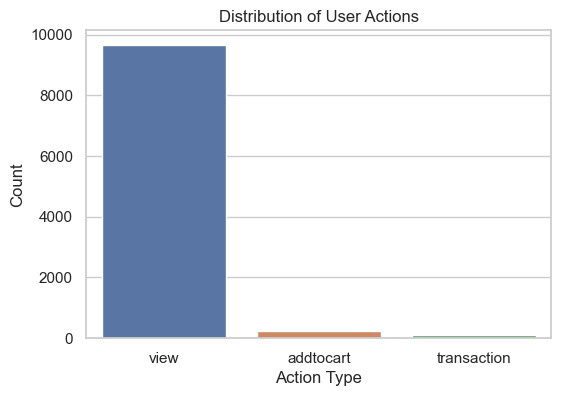

In [8]:
#  3. Distribution of Action Types
plt.figure(figsize=(6, 4))
sns.countplot(data=interactions, x='action', order=['view', 'addtocart', 'transaction'])
plt.title("Distribution of User Actions")
plt.xlabel("Action Type")
plt.ylabel("Count")
plt.show()


In [9]:
#  4. Most Active Users
top_users = interactions['user_id'].value_counts().head(10)
print("Top 10 Most Active Users:")
print(top_users)


Top 10 Most Active Users:
user_id
286616     101
820159      73
350566      45
404403      39
1093035     38
1235292     33
307542      32
322407      24
1210904     24
173858      23
Name: count, dtype: int64


In [10]:
#  5. Most Popular Products
top_products = interactions['product_id'].value_counts().head(10)
print("Top 10 Most Interacted Products:")
print(top_products)


Top 10 Most Interacted Products:
product_id
355994    19
370653    19
315543    18
298009    15
335975    13
235224    12
42002     11
428257    11
299044    11
393111    10
Name: count, dtype: int64


In [12]:
#  6. Sparsity of the User-Product Interaction Matrix
n_users = interactions['user_id'].nunique()
n_products = interactions['product_id'].nunique()
n_interactions = len(interactions)

total_possible = n_users * n_products
sparsity = 1 - (n_interactions / total_possible)

print(f" Users: {n_users}")
print(f" Products: {n_products}")
print(f" Interactions: {n_interactions}")
print(f" Sparsity of Interaction Matrix: {sparsity:.4f}")


 Users: 6957
 Products: 7196
 Interactions: 10000
 Sparsity of Interaction Matrix: 0.9998


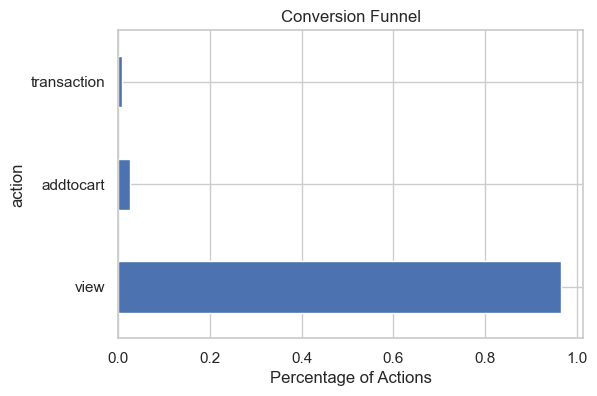

In [13]:
#  7. Conversion Funnel: Views → Cart → Purchase
plt.figure(figsize=(6, 4))
funnel = interactions['action'].value_counts(normalize=True).loc[['view', 'addtocart', 'transaction']]
funnel.plot(kind='barh')
plt.title("Conversion Funnel")
plt.xlabel("Percentage of Actions")
plt.show()
